ab)

### Training Model ###
[Iteration 0] : 2120.0278295252197, 6130.027829525217, 0.6669109741989911
[Iteration 200] : 609.4619093417251, 390.53875795064766, 0.6591567320441177
[Iteration 400] : 614.6075192376546, 379.91956885144003, 0.6573641029650371
[Iteration 600] : 615.2862953610611, 378.37573590067984, 0.6570906131848265
[Iteration 800] : 615.314007916711, 378.2465776575738, 0.6570625206337277
[Iteration 1000] : 615.2269907039868, 378.3695369829348, 0.657078460204647
[Iteration 1200] : 615.1190089417089, 378.5384852938102, 0.6571024416272828
[Iteration 1400] : 615.0071255026636, 378.71587138509113, 0.6571278973471012
[Iteration 1600] : 614.8944668986771, 378.8948242112849, 0.657153625010403
[Iteration 1800] : 614.7816067446224, 379.07408602485225, 0.6571794044422418


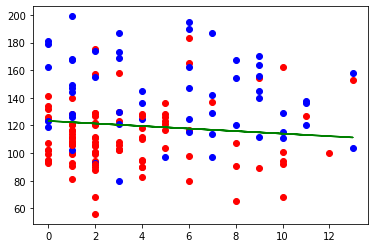

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def validate(data, target, weight, bias):
    z = np.dot(data.iloc[:,0], weight[0]) + np.dot(data.iloc[:,1], weight[1]) + bias
    pred = sigmoid(z)

    accuracy = 1 - (np.sum(abs(pred - target)) / len(data.iloc[:,0]))
    return accuracy

def cross_entropy(prediction, target):
    return np.subtract(np.dot(-target, np.log(prediction)), np.dot(np.subtract(1, target), np.log(np.subtract(1, prediction))))

def log_cross_entropy(z, target):
    return np.dot(target, np.log(1 + math.e ** (-z))) + np.dot(1 - target, np.log(1 + math.e ** (-z)))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

def graph(data, target):
    for i in range(len(target)):
        if(target.iloc[i] == 0):
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='red')
        else:
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='blue')
    plt.show()

def graph_result(data, target, weight, bias):
    for i in range(len(target)):
        if(target.iloc[i] == 0):
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='red')
        else:
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='blue')
    #plt.scatter(range(len(data.iloc[:,0])), target, color='red')
    y = - (bias + np.dot(weight[0], data.iloc[:,0])) / weight[1]
    plt.plot(data.iloc[:,0], y, color='green')
    plt.show()
    
'''
    log regr gradient trainer
    returns final input weights
'''
def LRGradDesc(data, target, data_test, target_test, weight_init, bias_init, learning_rate, max_iter):
    
    print("### Training Model ###")
    N = len(data.iloc[:,0])
    current_weight = [weight_init, weight_init]
    current_bias = bias_init
    theta = np.zeros((data.shape[1], 1))

    for i in range(max_iter):
        z = np.dot(data.iloc[:,0], current_weight[0]) + np.dot(data.iloc[:,1], current_weight[1]) + current_bias
        pred = sigmoid(z)
        diff = pred - target
        #TODO: use correct cost function
        cost = cross_entropy(pred, target)
        log_cost = log_cross_entropy(z, target)
        current_weight[0] = current_weight[0] - ((learning_rate/N) * np.sum(data.iloc[:,0] * diff))
        current_weight[1] = current_weight[1] - ((learning_rate/N) * np.sum(data.iloc[:,1] * diff))
        current_bias = current_bias - ((learning_rate/N) * np.sum(diff))

        train_accuracy = 1 - (np.sum(abs(diff)) / N)
        test_accuracy = validate(data_test, target_test, current_weight, current_bias)

        if i % 200 == 0:
           print("[Iteration " + str(i) + "] : " + str(cost) + ", " + str(log_cost) + ", " + str(test_accuracy))
 
    return current_weight, current_bias

'''
    pearson coeff feature selection
    returns top 2 feature indices
'''
def feature_selection(data, target):
    correlations = []
    for i in range(0, len(data.iloc[1,:])):
        correlations.append(pearsonr(data.iloc[:,i], target)[0])
    
    sorted_correl = sorted(correlations, reverse=True)
    return correlations.index(sorted_correl[0]), correlations.index(sorted_correl[1])

if __name__ == "__main__":

    # get file data
    data_file = pd.read_csv("data-sets/diabetes.csv")
    X = data_file.iloc[1:,:8] # Features
    y = data_file.iloc[1:,8] # Target variable

    # TODO: must be a randomized selection
    # spltting train and test data
    split_index = int(math.floor(len(y) * 0.8))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    
    # get optimal pearson features
    key_features = feature_selection(X_train, y_train)

    # train model
    weight, bias = LRGradDesc(X_train.iloc[:, [key_features[0], key_features[1]]], y_train, X_test.iloc[:, [key_features[0], key_features[1]]], y_test, 0, -10, 0.001, 2000)
    graph_result(X_test, y_test, weight, bias)

c)

d)

Final Weights: [-7.50855399], [[0.03461369 0.07757532]]
Final Accuracy: 0.7727272727272727


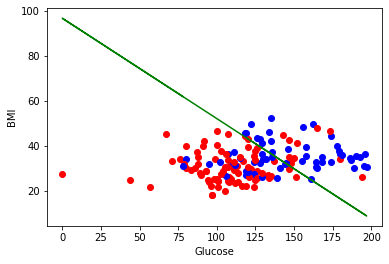

In [3]:
'''
    Logistic Regression Gradient Descent using sklearn
'''
import pandas as pd
import numpy as np
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def graph_result(data, target, model):
    for i in range(len(target)):
        if(target.iloc[i] == 0):
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='red')
        else:
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='blue')
    
    y = - (model.intercept_[0] + np.dot(model.coef_[0][0], data.iloc[:,0])) / model.coef_[0][1]
    plt.plot(data.iloc[:,0], y, color='green')
    plt.xlabel(data.columns.values[0])
    plt.ylabel(data.columns.values[1])
    plt.show()

'''
    pearson coeff feature selection
    returns top 2 feature indices
'''
def feature_selection(data, target):
    correlations = []
    for i in range(0, len(data.iloc[1,:])):
        correlations.append(pearsonr(data.iloc[:,i], target)[0])
    
    sorted_correl = sorted(correlations, reverse=True)
    return correlations.index(sorted_correl[0]), correlations.index(sorted_correl[1])

if __name__ == "__main__":

    # get file data
    data_file = pd.read_csv("data-sets/diabetes.csv")
    shuffled_data = data_file.sample(frac=1)
    X = shuffled_data.iloc[1:,:8] # Features
    y = shuffled_data.iloc[1:,8] # Target variable

    # spltting train and test data
    split_index = int(math.floor(len(y) * 0.8))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    # get optimal pearson features
    key_features = feature_selection(X_train, y_train)

    # train model
    model = LogisticRegression()
    model.fit(X_train.iloc[:, [key_features[0], key_features[1]]], y_train)
    
    # make predictions
    pred = model.predict(X_test.iloc[:, [key_features[0], key_features[1]]])
    accuracy = accuracy_score(pred, y_test)
    weights = model.coef_
    print("Final Weights: " + str(model.intercept_) + ", " + str(weights))
    print("Final Accuracy: " + str(accuracy))

    graph_result(X_test.iloc[:, [key_features[0], key_features[1]]], y_test, model)

e)